## Logistic Regression 

* Make a classification data set
* Motivating example - Horse or Not?
* Logistic regression to predict probability of being a horse
* Use of probability to classify a row of data as Horse or Not using classification threshold
* Visualization of results for a trained model and one classification threshold in a Confusion Matrix
* Visualization of results for a trained model and all classification thresholds in a ROC curve

### Set up

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

# set larger font sizes and the style
import matplotlib as mpl
font_size = 24
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams['xtick.labelsize'] = font_size-5
mpl.rcParams['ytick.labelsize'] = font_size-5
plt.style.use('bmh')

%matplotlib inline

### Make a Horse - Dog dataset for classifiction (Horse or Not?)


<img src="./imgs/horse_and_dog.png" alt="Drawing" style="width: 500px;"/>

In [2]:
# LARGE DOGS AND SMALL HORSES - SET DISTRIBUTION PARAMETERS
# MAY OR MAY NOT CORRESPOND TO ACTUAL EARTH MAMMAL DIMENSIONS

number_of_observations = 100 # per class
dog_weight_mean = 80
dog_weight_stddev = 10
dog_height_mean = 20
dog_height_stddev = 10
horse_weight_mean = 100
horse_weight_stddev = 10
horse_height_mean = 42
horse_height_stddev = 10

In [3]:
# GENERATE SAMPLE OBSERVATIONS
np.random.seed(42)
dog_weights = np.random.normal(dog_weight_mean,
                               dog_weight_stddev,
                               number_of_observations)
dog_heights = np.random.normal(dog_height_mean,
                               dog_height_stddev,
                               number_of_observations)
dog_targets = [0]*number_of_observations # dogs are 0

horse_weights = np.random.normal(horse_weight_mean,
                                 horse_weight_stddev,
                                 number_of_observations).clip(80)
horse_heights = np.random.normal(horse_height_mean,
                                 horse_height_stddev,
                                 number_of_observations)
horse_targets = [1]*number_of_observations # horses are 1

# combine data sets
weights = np.hstack((dog_weights, horse_weights))
heights = np.hstack((dog_heights, horse_heights))

X = np.vstack((weights, heights)).T.clip(min=1)
y = np.hstack((dog_targets,horse_targets))

# separate arrays for plotting later
X_horses = X[y == 1]  
y_horses = y[y == 1]

X_dogs = X[y == 0]
y_dogs = y[y == 0]

In [4]:
print("X\t\t\ty")
print("weight\theight\t\tclass")
for (weight, height), clss in zip(X,y):
    print("{0:0.1f}\t{1:0.1f}\t\t{2}".format(weight, height, clss))

X			y
weight	height		class
85.0	5.8		0
78.6	15.8		0
86.5	16.6		0
95.2	12.0		0
77.7	18.4		0
77.7	24.0		0
95.8	38.9		0
87.7	21.7		0
75.3	22.6		0
85.4	19.3		0
75.4	1.0		0
75.3	19.7		0
82.4	20.6		0
60.9	44.6		0
62.8	18.1		0
74.4	23.0		0
69.9	19.7		0
83.1	8.3		0
70.9	31.4		0
65.9	27.5		0
94.7	27.9		0
77.7	10.9		0
80.7	34.0		0
65.8	6.0		0
74.6	25.9		0
81.1	41.9		0
68.5	10.1		0
83.8	14.3		0
74.0	21.0		0
77.1	15.0		0
74.0	4.5		0
98.5	20.7		0
79.9	9.4		0
69.4	24.7		0
88.2	10.8		0
67.8	35.5		0
82.1	12.2		0
60.4	16.8		0
66.7	28.1		0
82.0	7.7		0
87.4	22.3		0
81.7	33.1		0
78.8	3.9		0
77.0	21.8		0
65.2	22.6		0
72.8	27.8		0
75.4	7.6		0
90.6	6.8		0
83.4	25.2		0
62.4	23.0		0
83.2	22.5		0
76.1	23.5		0
73.2	13.2		0
86.1	22.3		0
90.3	22.9		0
89.3	12.9		0
71.6	38.7		0
76.9	24.7		0
83.3	8.1		0
89.8	26.6		0
75.2	10.3		0
78.1	27.9		0
68.9	31.6		0
68.0	11.8		0
88.1	29.6		0
93.6	24.1		0
79.3	28.2		0
90.0	39.0		0
83.6	17.5		0
73.5	12.5		0
83.6	11.1		0
95.4	11.8		0
79.6	19.2		0
95.6	23.4		0
53.8	22.8		0
88.2	28.3

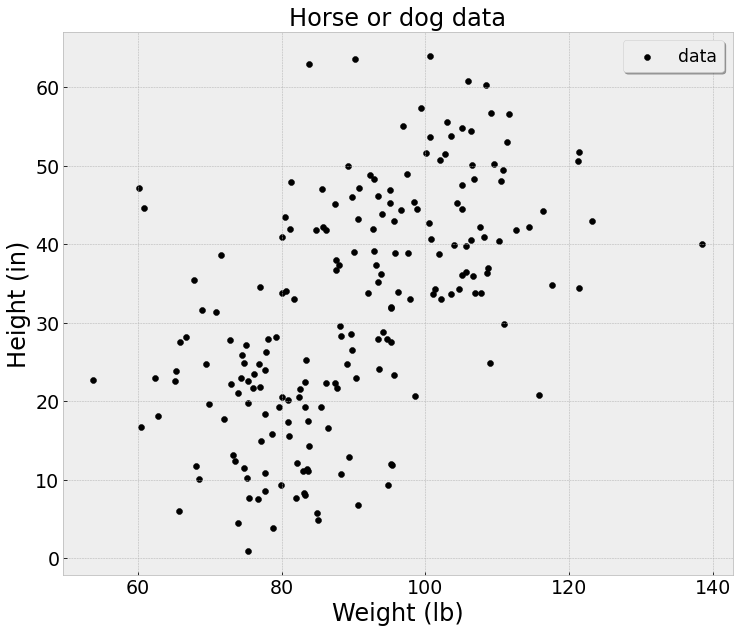

In [4]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], color='k', label='data')
ax.legend(shadow=True, fontsize='xx-large')
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Height (in)',fontsize=font_size)
ax.set_title('Horse or dog data',fontsize=font_size)
plt.show()

### Horseness as a function of weight

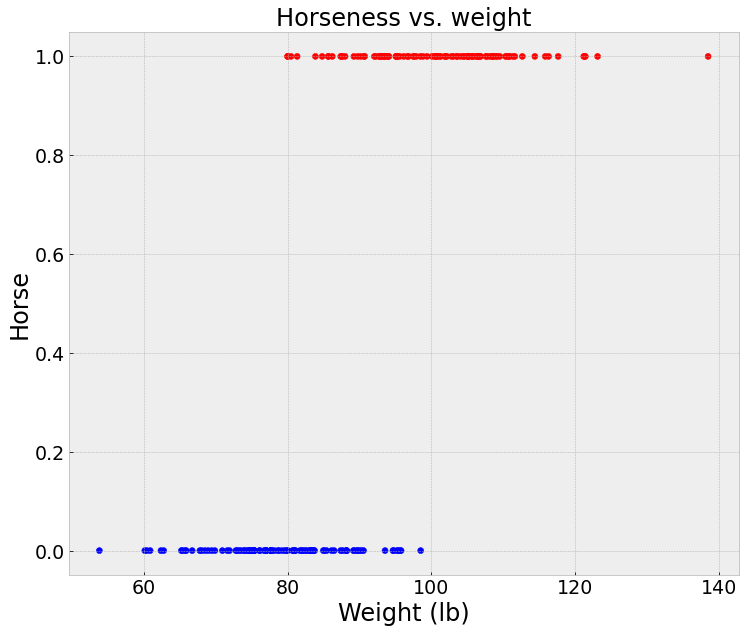

In [11]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr')
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

### Horseness as a function of height

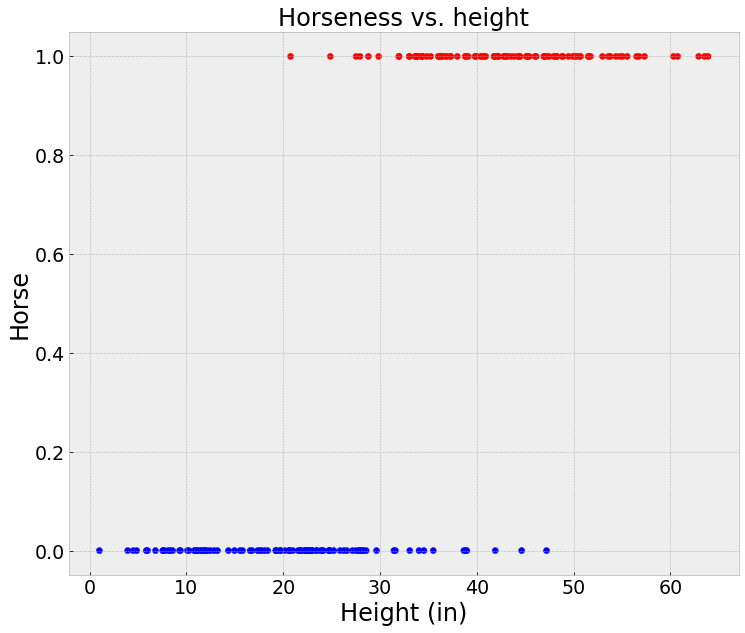

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,1], y, c=y, cmap='bwr')
ax.set_xlabel('Height (in)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. height',fontsize=font_size)
plt.show()

### Horseness a function of height and weight

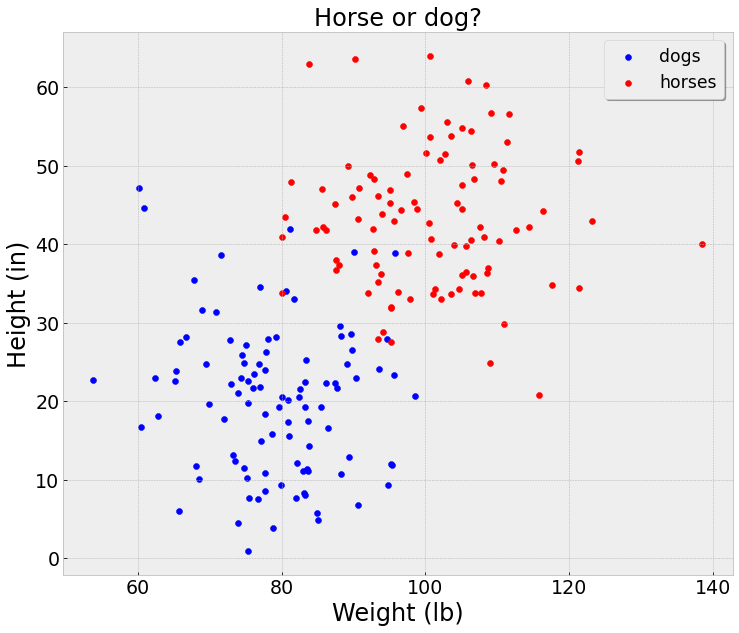

In [15]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X_dogs[:,0], X_dogs[:,1], color='b', label='dogs')
ax.scatter(X_horses[:,0], X_horses[:,1], color='r', label='horses')
ax.legend(shadow=True, fontsize='xx-large')
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Height (in)',fontsize=font_size)
ax.set_title('Horse or dog?',fontsize=font_size)
plt.show()

## Trying to model data: Horse vs Weight

### Try Linear Regression

In [16]:
lin_model_w = LinearRegression()
lin_model_w.fit(X[:,:1],y) # just fitting weight vs class

LinearRegression()

In [17]:
x_ = np.linspace(40,160,100)
line_ = lin_model_w.coef_*x_ + lin_model_w.intercept_

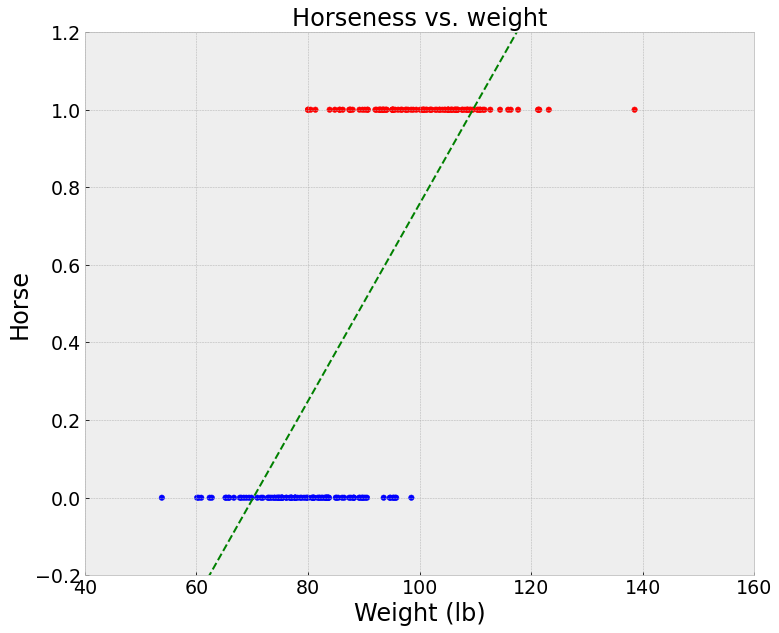

In [19]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr', s=30)
ax.plot(x_, line_, 'g--')
ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

### Problems with the above approach?

### Try Logistic Regression

In [20]:
log_model_w = LogisticRegression()
log_model_w.fit(X[:,:1],y) # fitting class to just weight for now

LogisticRegression()

In [21]:
x_ = np.linspace(40,160,100).reshape(-1,1)
sigmoid = log_model_w.predict_proba(x_)[:,1] # probability of positive class (horse)

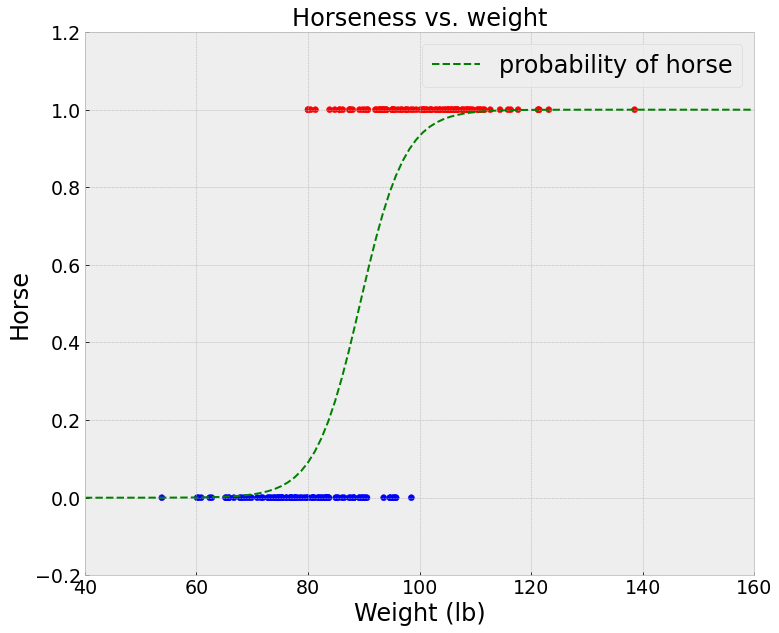

In [22]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, c=y, cmap='bwr')
ax.plot(x_, sigmoid, 'g--', label='probability of horse')
ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
ax.legend(fontsize=font_size)
plt.show()

### You are seeing the probability of being a horse as a function of weight above.

### To classify a datapoint as Horse or Not, need to set a horse probability threshold, which determines a weight cut-off point

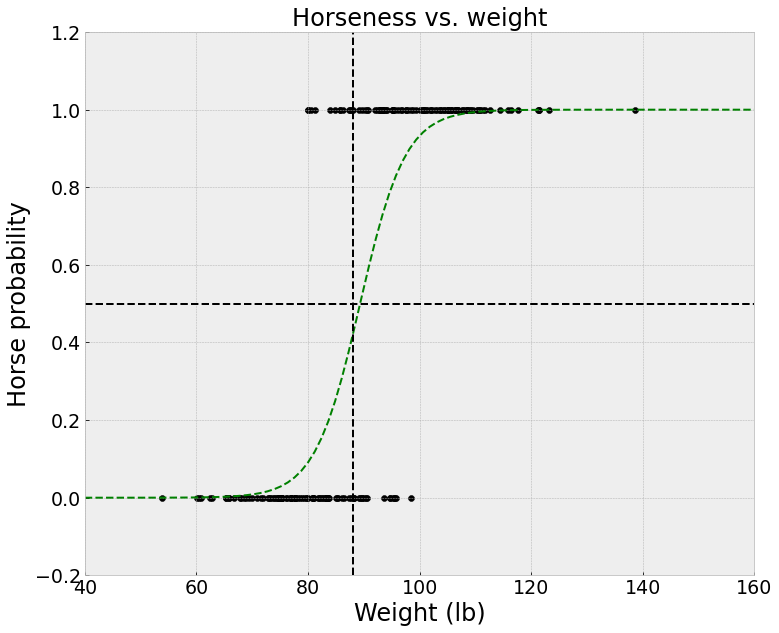

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(X[:,0], y, color='k')
ax.plot(x_, sigmoid, 'g--')
ax.axhline(0.5, color='k', linestyle='--')  # probability threshold
ax.axvline(88, color='k', linestyle='--')  # threshold intersects with sigmoid at 88 lbs

ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse probability',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

### The threshold and cutoff point classify the data

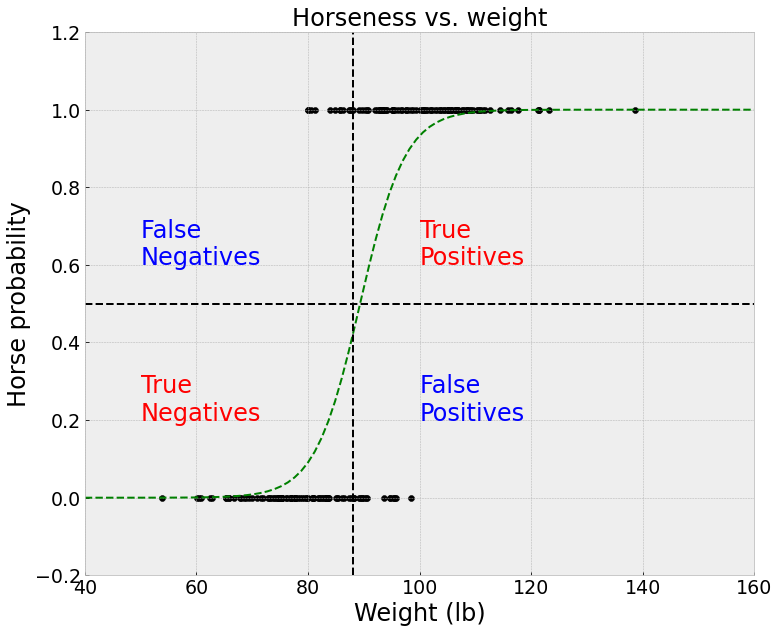

In [32]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(X[:,0], y, color='k')
ax.plot(x_, sigmoid, 'g--')
ax.axhline(0.5, color='k', linestyle='--')  # 
ax.axvline(88, color='k', linestyle='--')  # threshold intersects with sigmoid at 88 lbs

ax.text(50, 0.6, 'False \nNegatives', size=font_size,color='blue')
ax.text(50, 0.2, 'True \nNegatives', size=font_size,color='red')
ax.text(100, 0.6, 'True \nPositives', size=font_size,color='red')
ax.text(100, 0.2, 'False \nPositives', size=font_size,color='blue')

ax.set_xlim([40,160])
ax.set_ylim([-0.2,1.201])
ax.set_xlabel('Weight (lb)',fontsize=font_size)
ax.set_ylabel('Horse probability',fontsize=font_size)
ax.set_title('Horseness vs. weight',fontsize=font_size)
plt.show()

## Validation

### How good is our model?

### How good is our model (for a given threshold) -> [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

### How good is our model (across all thresholds) -> [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

## Confusion matrices

Thus in binary classification, the count of true negatives is `C_{0,0}`, false negatives is `C_{1,0}`, true positives is `C_{1,1}` and false positives is `C_{0,1}`.

In sklearn it is:

| TN | FP |
-------------
| FN | TP |
-------------


In [29]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    p = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontsize=font_size)
    
    plt.colorbar(p)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center", size = font_size,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label',fontsize=font_size)
    ax.set_xlabel('Predicted label',fontsize=font_size)

In [30]:
## Run logistic regression on all the data
classifier = LogisticRegression()
# note using .predict() below, which uses default 0.5 for a binary classifier
y_pred = classifier.fit(X,y).predict(X) # agh!
y_true = y

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print("| TN | FP |\n| FN | TP |\n")
print(cnf_matrix)

| TN | FP |
| FN | TP |

[[97  3]
 [ 2 98]]


Confusion matrix, without normalization
[[97  3]
 [ 2 98]]


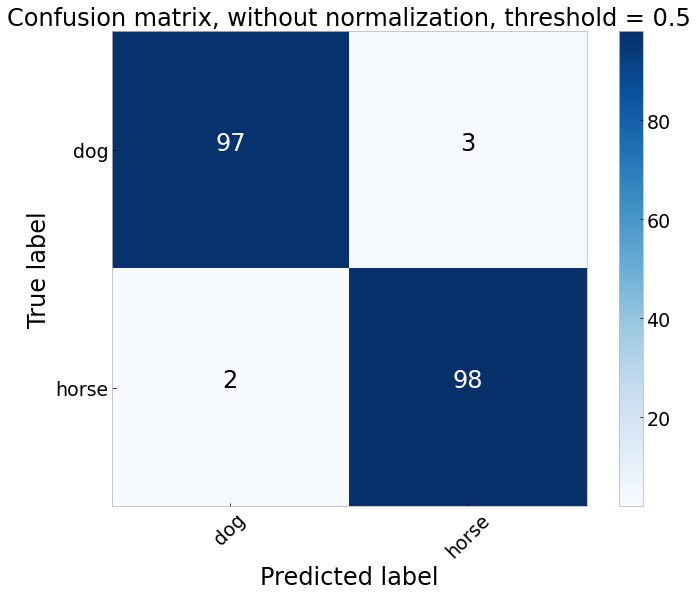

In [31]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["dog","horse"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,
                      title='Confusion matrix, without normalization, threshold = 0.5')

## Normalized version of confusion matrix

If there is a class inbalance (for visualization purposes) you may want to consider looking at a normalized version

Normalized confusion matrix
[[0.97 0.03]
 [0.02 0.98]]


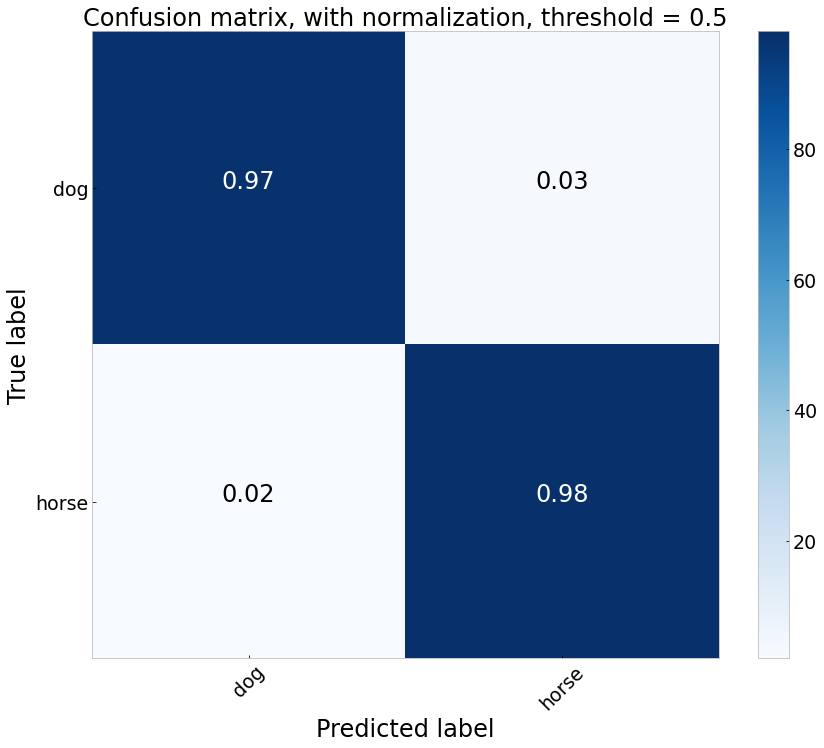

In [34]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.grid(False)
class_names = ["dog","horse"]
plot_confusion_matrix(cnf_matrix, ax, classes=class_names,normalize=True,
                      title='Confusion matrix, with normalization, threshold = 0.5')

### From the confusion matrix, can determine accuracy, or precision, or recall, or F1 score (can calculate TPR and our FPR).  Our application will determine which of these metric is the most useful measure of success for our model.

## ROC Curves

Remember when we selected that probability threshold to be 0.5?  If we slide it a little then we get a different confusion matrix.  If we stack these matrices and plot at the true positive rate and false positive rates then we have a ROC Curve.

ROC - receiver operating characteristic is a way of exploring the performance of a model by varying the decision threshold of a classifier.

In [21]:
## Run logistic regression on all the data
classifier = LogisticRegression()
# note using .predict_proba() below, which is the probability of each class
probs_0and1 = classifier.fit(X,y).predict_proba(X) # yes!
print("Probability not Horse, Horse:")
print(probs_0and1)
y_prob_H = probs_0and1[:,1]
print("\nProbability of Horse:")
print(y_prob_H)

Probability not Horse, Horse:
[[0.97 0.03]
 [0.9  0.1 ]
 [0.88 0.12]
 [0.93 0.07]
 [0.86 0.14]
 [0.73 0.27]
 [0.22 0.78]
 [0.78 0.22]
 [0.78 0.22]
 [0.83 0.17]
 [0.99 0.01]
 [0.84 0.16]
 [0.81 0.19]
 [0.15 0.85]
 [0.88 0.12]
 [0.77 0.23]
 [0.85 0.15]
 [0.96 0.04]
 [0.51 0.49]
 [0.65 0.35]
 [0.57 0.43]
 [0.95 0.05]
 [0.39 0.61]
 [0.98 0.02]
 [0.69 0.31]
 [0.17 0.83]
 [0.96 0.04]
 [0.91 0.09]
 [0.81 0.19]
 [0.91 0.09]
 [0.98 0.02]
 [0.78 0.22]
 [0.96 0.04]
 [0.73 0.27]
 [0.94 0.06]
 [0.37 0.63]
 [0.93 0.07]
 [0.9  0.1 ]
 [0.63 0.37]
 [0.96 0.04]
 [0.76 0.24]
 [0.42 0.58]
 [0.98 0.02]
 [0.79 0.21]
 [0.79 0.21]
 [0.63 0.37]
 [0.97 0.03]
 [0.97 0.03]
 [0.69 0.31]
 [0.79 0.21]
 [0.76 0.24]
 [0.75 0.25]
 [0.93 0.07]
 [0.76 0.24]
 [0.74 0.26]
 [0.92 0.08]
 [0.27 0.73]
 [0.72 0.28]
 [0.96 0.04]
 [0.63 0.37]
 [0.95 0.05]
 [0.61 0.39]
 [0.51 0.49]
 [0.95 0.05]
 [0.53 0.47]
 [0.7  0.3 ]
 [0.6  0.4 ]
 [0.23 0.77]
 [0.87 0.13]
 [0.94 0.06]
 [0.94 0.06]
 [0.93 0.07]
 [0.84 0.16]
 [0.72 0.28]
 [0.81 0

/Users/kayla.thomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob_H, pos_label=1)
auc = metrics.roc_auc_score(y_true, y_prob_H) # note we are scoring on our training data!

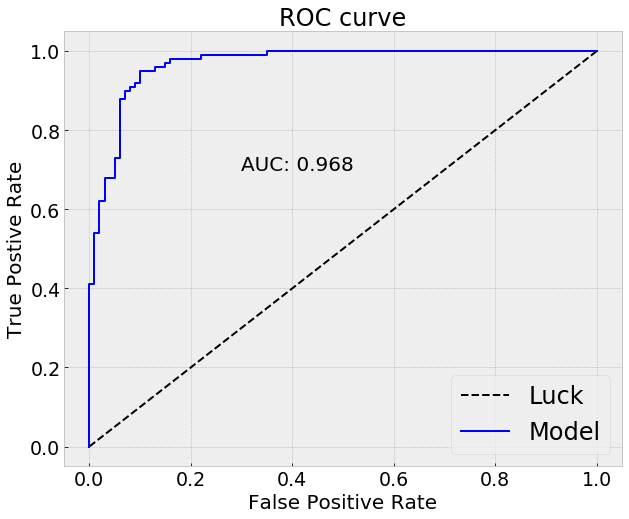

In [23]:
# Plot the ROC
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')
ax.plot(fpr, tpr, color='b', lw=2, label='Model')
ax.set_xlabel("False Positive Rate", fontsize=20)
ax.set_ylabel("True Postive Rate", fontsize=20)
ax.set_title("ROC curve", fontsize=24)
ax.text(0.3, 0.7, " ".join(["AUC:",str(auc.round(3))]), fontsize=20)
ax.legend(fontsize=24);

In [40]:
import numpy as np
import pandas as pd
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    Sort instances by their prediction strength (the probabilities)
    For every instance in increasing order of probability:
    Set the threshold to be the probability
    Set everything above the threshold to the positive class
    Calculate the True Positive Rate (aka sensitivity or recall)
    Calculate the False Positive Rate (1 - specificity)
    Return three lists: TPRs, FPRs, thresholds
    '''
    # df_prob = pd.DataFrame([probabilities, labels], columns = ['probabilities', 'labels'])
    # df_prob = pd.DataFrame()
    df_prob = pd.DataFrame({'probabilities':probabilities, 'label': labels})
    # df_prob['probabilities'] = probabilities
    # df_prob['labels'] = labels
    df_prob.sort_values('probabilities', inplace=True)
    thresh_array = []
    fpr_array = []
    tpr_array = []
    for i in df_prob['probabilities']:
        y_hat = np.zeros(len(df_prob))
        tn = 0
        tp = 0
        fp = 0
        fn = 0
        for idx2, j in enumerate(df_prob['probabilities']):
            if j >= i:
                y_hat[idx2] = 1
            else:
                y_hat[idx2] = 0
            if (df_prob['label'][idx2] == y_hat[idx2]) and (y_hat[idx2] == 0):
                tn += 1
            elif (df_prob['label'][idx2] == y_hat[idx2]) and (y_hat[idx2] == 1):
                tp += 1
            elif (df_prob['label'][idx2] != y_hat[idx2]) and (y_hat[idx2] == 1):
                fp += 1
            elif (df_prob['label'][idx2] != y_hat[idx2]) and (y_hat[idx2] == 0):
                fn += 1
        thresh_array.append(i)
#         print(f"TN {tn}, TP{tp}, FP{fp}, FN{fn}", (fp)/(tn + fp))
        # print(tn + tp + fp + fn, )
        # print((fp)/(tn + fp))
        # print((tp)/(tp + fn))
        fpr_array.append((fp)/(tn + fp))
        tpr_array.append((tp)/(tp + fn))
    return (tpr_array, fpr_array, thresh_array)
    #Could Work
    # actual_p = np.sum(df_prob['labels'])
    # actual_n = len(df_prob['labels'])-tp
    # fp = np.sum(y_hat)-tp
    # fn = len(y_hat)-tn

In [41]:
tpr_array, fpr_array, thresh_array = roc_curve(y_prob_H, y_true)

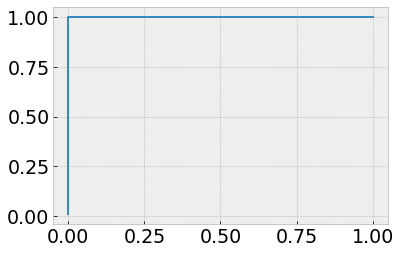

In [42]:
plt.plot(fpr_array, tpr_array)

In [43]:
def run_fake_data():
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                               n_clusters_per_class=2, n_samples=1000)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_test)[:, 1]

    tpr, fpr, thresholds = roc_curve(probabilities, y_test)

    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity, Recall)")
    plt.title("ROC plot of fake data")
    plt.show()

/Users/kayla.thomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


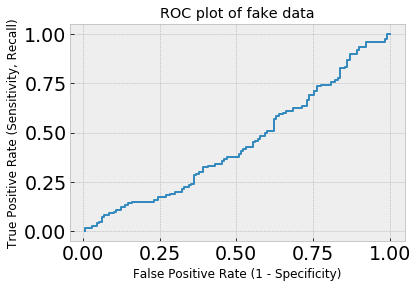

In [44]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
run_fake_data()